<center>
    <header>
        <h1>Identifying Redditors Who Are Likely to Use Bigoted Language
        </h1>
        <h3>
            or
        </h3>
        <h1>Killing Your Faith in Humanity With a Capstone Project
        </h1>
    </header>
</center>

<header>
    <center>
        <h1>Where to Find the Data?
        </h1>
    </center>
    <h3>Luckily, there are places like r/AgainstHateSubreddits, where I was able to find:</h3><br>
    <b>
        <ul>
            <li>r/AntiLGBTQIA</li>
            <li>r/HardUnpopularOpinion</li>
            <li>r/DiversityNews</li>
            <li>r/JusticeServed</li>
            <li>r/MetaCanada</li>
            <li>... and some others whose names I'm choosing to omit</li>
        </ul>
    </b>
</header>


<center>
<header>
    <h1>Limitations of Reddit API</h1>    </header>
</center>
    <ul>
    <b><li>Even without limit, it is only possible to get 1000 comments from a Redditor instance</li><br>
        <li>There are, however, 4 different orderings of comments that one can access: </li>
        <ol>
            <li>controversial</li>
            <li>hot</li>
            <li>new</li>
            <li>top</li>
            </ol></b>
    </ul>


<center>
    <header>
        <h1>Scraping the Subreddits:</h1>
        <h3>Still a fag for drinking wine.    IPA is the way to go pussy.<br>-/u/scsk8r831</h3><br>
    </header>
    
</center>

<code>
</code>

<center>
    <header>
        <h1>Scraping the Subreddits:</h1>
    </header>
</center>
<code>
    
def scrape_subreddits(searched_subs, reddit, dictionary, queue):
    sorting_methods = \
        [ lambda sub: reddit.subreddit(sub).hot(),
          lambda sub: reddit.subreddit(sub).new(),
          lambda sub: reddit.subreddit(sub).top(),
          lambda sub: reddit.subreddit(sub).controversial() ]

    for subreddit in searched_subs:
        for sorting in sorting_methods:
            for submission in sorting(subreddit):
                parse_comment_forest(submission.comments,\
                                        dictionary,queue)
        while len(queue) >= 1:
            parse_comment_forest(queue.popleft(),\
                                dictionary, queue)
</code>


<center>
    <header>
        <h1>Scraping the Subreddits:</h1>
    </header>
</center>
<code><code>
    
def parse_comment_forest(comment_forest, dictionary, deq):
    comment_forest.replace_more(limit=None)
    for comment in comment_forest.list():
        if comment.id not in dictionary['reference_set']:
            build_dataframe(comment, df1)
            deq.append(comment.replies)
            
</code>

<center><h1>Breakdown of Slurs by Type<br>When Scraping Users</h1></center>
<img src='slur_fractions.png'>

<center><h1>Breakdown of Slurs by Type<br>When Scraping Subreddits</h1></center>
<img src='fresh_slur_fractions.png'>

<center><h1>But those last slides make things look a lot worse than they really are.</h1></center>
<img src='all_slurs.png'>

<center><h1>Next Steps</h1></center>
<ul>
    <li>Collect more data / from more subreddits</li>
    <li>Improve on how slurs are identified</li>
    <li>Actually build a model</li>
</ul>

<center><h1>End</h1></center>

In [42]:
def used_slur(string):
    if type(string) == str:
        low = string.lower()
        for slur in slurs:
            if slur in low:
                return 1
    return 0

In [125]:
def religion(text):
    if type(text) == str:
        low = text.lower()
        for slur in religious:
            if slur in low:
                return 1
    return 0
def race(text):
    if type(text) == str:
        low = text.lower()
        for slur in racial:
            if slur in low:
                return 1
    return 0
def queer(text):
    if type(text) == str:
        low = text.lower()
        for slur in lgbt:
            if slur in low:
                return 1
    return 0

In [59]:
def first_slur_used(string):
    if type(string) == str:
        low = string.lower()
        for slur in slurs:
            if slur in low:
                return slur
    return 'None'

In [60]:
def all_slurs_used(string):
    used_slurs = []
    if type(string) == str:
        low = string.lower()
        for slur in slurs:
            if slur in low:
                used_slurs.append(slur)
    if len(used_slurs) > 1:
        return ' | '.join(used_slurs)
    elif len(used_slurs) == 1:
        return used_slurs[0]
    else:
        return 'None'

In [121]:
religious = ['christ-killer','christ killer','goy','heeb','hebe',
             'kike','jewboy','kyke','raghead','rag head','shylock',
             'towel head','camel jockey','toucan sam'
            ]
racial = ['gook','ching chong','chink','half-breed', 'half breed',
          'jigaboo','jiggabo', 'jig', 'jigga', 'jigger',
          'jungle buny','niglet','nig-nog', 'nig nog', 'nignog',
          'nigger','nigga', 'nigress', 'niggah', 'nigga','niqq',
          'nigg','porch monkey','raghead', 'rag head', 'sambo',
          'slant-eye', 'slant eye','spic','spick','spik',
          'tar baby', 'tar-baby','tyrone','towel head',
          'uncle tom','wetback','beaner','camel jockey',
          'coon-ass', 'coon','tnb','yard ape','welfare queen',
          'unemployus','three-fifth','three fifths', 
          'three fifth', 'three-fifths','point six', 
          'point-six', '36-30', 'thirty-six-thirty',
          'thirty-six thirty','thirtysix-thirty',
          'thirtysix thirty','satchmo','sambo','race traitor',
          'race-traitor','mammy','pickaninny','sheboon',
          'furfag','chimpout','chimp out'
]

lgbt = ['fag','cocksucker','queer','dyke']


In [122]:
slurs = []
slurs.extend(racial)
slurs.extend(lgbt)
slurs.extend(religious)

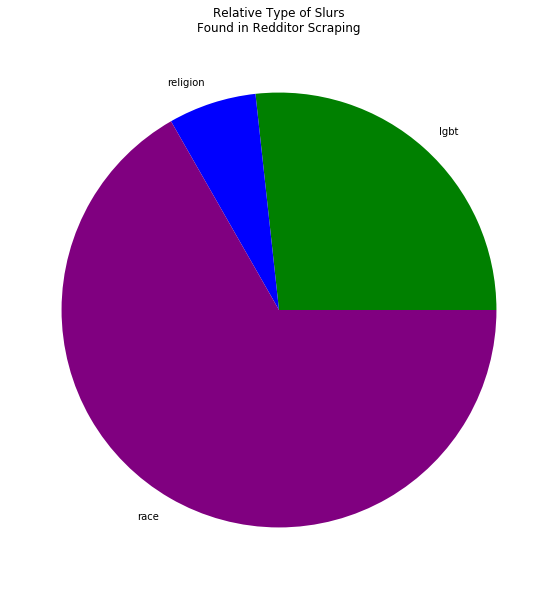

In [159]:
keys = ['lgbt','religious','race']

import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,10))
ax.pie([final_user_data[key].sum() for key in keys],labels=['lgbt','religion','race'],colors=['green','blue','purple'])
ax.set_title('Relative Type of Slurs\nFound in Redditor Scraping')
plt.savefig('slur_fractions.png')

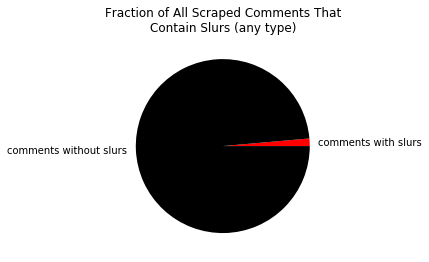

In [170]:
pie = [fresh['slurred'].sum(),fresh.shape[0]-fresh['slurred'].sum()]
plt.pie(pie,labels=['comments with slurs','comments without slurs'],colors=['red','black'])
plt.title('Fraction of All Scraped Comments That\nContain Slurs (any type)')
plt.savefig('all_slurs.png')